In [1]:
import sys
import pandas as pd
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh

In [2]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF"]
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg']
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP'] #, 'sp', 'CJ', 'UR']
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}
min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}

In [3]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
factor_list = ['lrstd','upstd','lrskew','lrkurt','mincnt','volmf','oimf','trdstr','volmfratio']
shared_cols = ['date', 'split_idx']
start_date = datetime.date(2010, 1, 1)
end_date = datetime.date(2021, 5, 7)
pnl_tenors = ['1y', '2y', '3y', '4y', '5y', '6y', '8y']

delimiter = '-'
atr_win = 20
file_folder = "C:\\dev\\data\\data_cache\\"

sim_products = ind_all_mkts + ags_all_mkts
need_shift = 1
freq = 's11'


if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict
    
dbtbl_prefix = ''
args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
base2_args = {'roll_rule': '-40b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
v_args  = {'roll_rule': '-28b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
sc_args = {'roll_rule': '-20b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
bond_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
precious_args = {'roll_rule': '-25b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}

df_list = []

for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['ni']:
        use_args = base2_args
    elif asset in ['sc']:
        use_args = sc_args
    elif asset in ['v']:
        use_args = v_args
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date        
    for idy, nb in enumerate([1, 2]):
        if freq == 'd':
            use_args['n'] = nb
            print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
            df = misc.nearby(asset, **use_args)
            xdf = df[field_list]
        else:
            filename = "%s_%s_%s_%s.csv" % (asset, nb, freq, end_date.strftime("%Y%m%d"))
            df = pd.read_csv(file_folder + filename, index_col=0)
            df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))            
            df['datetime'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
            df = df.drop_duplicates(subset=['date', 'split_idx'], keep='last').set_index(['date', 'split_idx'])
            df = df.drop(['cum_idx'], axis=1)
            ep_field = [ col for col in df.columns if 'exec_price' in col]
            xdf = df[field_list + ep_field + factor_list]
            #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)        
        xdf.columns = [delimiter.join((asset+str(nb), col)) for col in xdf.columns]
        df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
if freq == 'd':
    df.index.name = 'date'
df = df.reset_index()
if freq != 'd':
    df['date'] = df['date'].dt.date
print(df.tail(20))


<ipython-input-3-4d990350df07>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
<ipython-input-3-4d990350df07>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)


            date  split_idx  rb1-open  rb1-high  rb1-low  rb1-close  \
2493  2021-04-07          0    5151.0    5178.0   5058.0     5118.0   
2494  2021-04-08          0    5118.0    5163.0   5058.0     5116.0   
2495  2021-04-09          0    5129.0    5146.0   5042.0     5067.0   
2496  2021-04-12          0    5068.0    5096.0   4937.0     4985.0   
2497  2021-04-13          0    4993.0    5125.0   4986.0     5115.0   
2498  2021-04-14          0    5152.0    5175.0   5097.0     5116.0   
2499  2021-04-15          0    5122.0    5165.0   5088.0     5107.0   
2500  2021-04-16          0    5103.0    5194.0   5087.0     5118.0   
2501  2021-04-19          0    5120.0    5142.0   5061.0     5082.0   
2502  2021-04-20          0    5088.0    5171.0   5071.0     5165.0   
2503  2021-04-21          0    5166.0    5189.0   5126.0     5189.0   
2504  2021-04-22          0    5194.0    5237.0   5178.0     5208.0   
2505  2021-04-23          0    5229.0    5300.0   5205.0     5300.0   
2506  

In [9]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "ryield")
    params = input_args.get('params', [0.0, 0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    exec_field = input_args.get('exec_field', 'open')
    select_cols = []
    data_field = ''
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))
    
    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date']>= start_date]
    if end_date:
        xdf = xdf[xdf['date']<= end_date]
    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        
        for field in reverse_list:
            if field in run_mode:
                if delimiter.join((asset + str(1), field)) in xdf.columns:
                    xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
                else:
                    print("Field=%s is not in dataframe." % field)
                break            
                
        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x)) 
        data_field = run_mode
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        if 'sma' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == run_mode[-3:]:   
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    adf = xdf[select_cols].copy()
    fdf = adf[[delimiter.join((asset, data_field)) for asset in mod_prod_list]]
    adf['prod_count'] = fdf.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    adf['rebal_seqno'] = range(len(adf.index))
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            pflag = (adf[delimiter.join((asset, data_field))] >= 0) & rebal_flag
            nflag = (adf[delimiter.join((asset, data_field))] <= 0) & rebal_flag
            long_tmp.loc[pflag, asset] = adf.loc[pflag, delimiter.join((asset, data_field))]
            long_tmp.loc[nflag, asset] = 0.0
            short_tmp.loc[nflag, asset] = -adf.loc[nflag, delimiter.join((asset, data_field))]
            short_tmp.loc[pflag, asset] = 0.0 
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp/rebal_freq
        short_pos = short_pos + short_tmp/rebal_freq
    
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk  \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        short_pos[asset] = (short_pos[asset] * total_risk \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        elif 's' in freq:
            tdf['date'] = adf['date']
            tdf['split_idx'] = adf['split_idx']
        elif freq == 'd':
            tdf['date'] = adf['date']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res


In [7]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args['quantile']
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    select_cols = []
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))
    exec_field = input_args.get('exec_field', 'open')
        
    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date'] >= start_date]
    if end_date:
        xdf = xdf[xdf['date'] <= end_date]

    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win)

        for field in reverse_list:
            if field in run_mode:
                if delimiter.join((asset + str(1), field)) in xdf.columns:
                    xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
                else:
                    print("Field=%s is not in dataframe." % field)
                break            
                
        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        data_field = run_mode
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        if 'sma' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == run_mode[-3:]:   
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)

        elif 'nma' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    rank_field = run_mode
    adf = xdf[select_cols].copy()
    rank_df = adf[[delimiter.join((asset, rank_field)) for asset in mod_prod_list]].rank(axis=1)
    rank_df.columns = mod_prod_list
    
    adf['prod_count'] = rank_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1).fillna(0)
    adf['kcut'] = (adf['prod_count'] * quantile_cutoff).astype('int')
    adf['upper_rank'] = adf['prod_count'] - adf['kcut']
    adf['lower_rank'] = adf['kcut'] + 1 
    adf['rebal_seqno'] = range(len(adf.index))

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            long_tmp.loc[(rank_df[asset]>adf['upper_rank']) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=adf['upper_rank']) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<adf['lower_rank']) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=adf['lower_rank']) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        #long_sum = long_tmp.sum(axis=1)
        #short_sum = short_tmp.sum(axis=1)        
        long_pos = long_pos + long_tmp/ rebal_freq #.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp/ rebal_freq  #.div(short_sum,axis=0)
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        elif 's' in freq:
            tdf['date'] = adf['date']
            tdf['split_idx'] = adf['split_idx']
        elif freq == 'd':
            tdf['date'] = adf['date']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res

<ipython-input-8-272b9d2df13a>:59: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_pnl = pd.Series()
<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


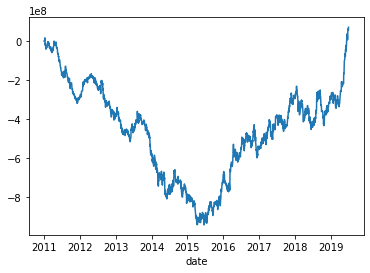

                xsfact-lrkurtsma-commod_mkts-1-1-1-0.2
sharp_ratio_1y                            2.574641e+00
sharp_ratio_2y                            1.124452e+00
sharp_ratio_3y                            1.031374e+00
sharp_ratio_4y                            1.236215e+00
sharp_ratio_5y                            8.106049e-01
sharp_ratio_6y                            4.345840e-01
sharp_ratio_8y                            1.532098e-01
std_pnl_1y                                1.295009e+07
std_pnl_2y                                1.311867e+07
std_pnl_3y                                1.338568e+07
std_pnl_4y                                1.314214e+07
std_pnl_5y                                1.299327e+07
std_pnl_6y                                1.289834e+07
std_pnl_8y                                1.196408e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


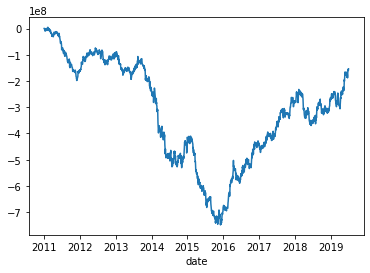

                xsfact-lrkurtsma-commod_mkts-1-1-5-0.2
sharp_ratio_1y                            1.782136e+00
sharp_ratio_2y                            9.489316e-01
sharp_ratio_3y                            1.218058e+00
sharp_ratio_4y                            1.058828e+00
sharp_ratio_5y                            5.565494e-01
sharp_ratio_6y                            1.055689e-02
sharp_ratio_8y                           -1.104766e-01
std_pnl_1y                                7.420598e+06
std_pnl_2y                                7.200685e+06
std_pnl_3y                                7.277294e+06
std_pnl_4y                                7.355991e+06
std_pnl_5y                                7.715034e+06
std_pnl_6y                                7.889875e+06
std_pnl_8y                                7.296819e+06


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

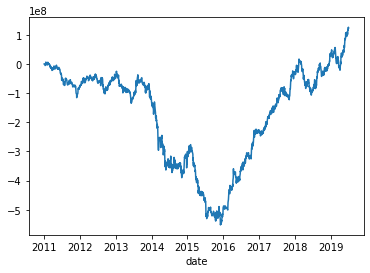

                xsfact-lrkurtsma-commod_mkts-1-1-10-0.2
sharp_ratio_1y                             2.217232e+00
sharp_ratio_2y                             1.345062e+00
sharp_ratio_3y                             1.708809e+00
sharp_ratio_4y                             1.536076e+00
sharp_ratio_5y                             8.938855e-01
sharp_ratio_6y                             3.643291e-01
sharp_ratio_8y                             1.981812e-01
std_pnl_1y                                 6.268873e+06
std_pnl_2y                                 6.207362e+06
std_pnl_3y                                 6.137736e+06
std_pnl_4y                                 6.279894e+06
std_pnl_5y                                 6.748447e+06
std_pnl_6y                                 7.068267e+06
std_pnl_8y                                 6.512701e+06


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

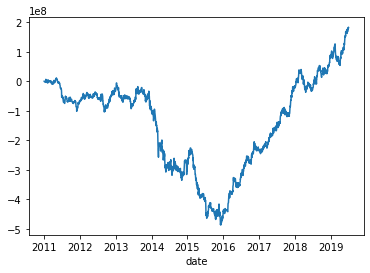

                xsfact-lrkurtsma-commod_mkts-1-1-15-0.2
sharp_ratio_1y                             2.328405e+00
sharp_ratio_2y                             1.874313e+00
sharp_ratio_3y                             1.877754e+00
sharp_ratio_4y                             1.601669e+00
sharp_ratio_5y                             9.407976e-01
sharp_ratio_6y                             4.194975e-01
sharp_ratio_8y                             2.732130e-01
std_pnl_1y                                 5.833021e+06
std_pnl_2y                                 5.835784e+06
std_pnl_3y                                 5.805649e+06
std_pnl_4y                                 5.961707e+06
std_pnl_5y                                 6.446475e+06
std_pnl_6y                                 6.727861e+06
std_pnl_8y                                 6.195047e+06


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

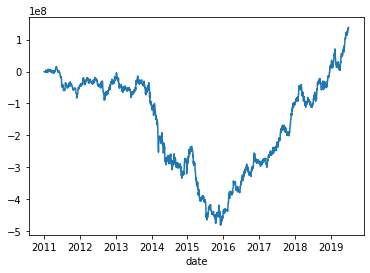

                xsfact-lrkurtsma-commod_mkts-1-1-20-0.2
sharp_ratio_1y                             2.701933e+00
sharp_ratio_2y                             2.093889e+00
sharp_ratio_3y                             1.861526e+00
sharp_ratio_4y                             1.539540e+00
sharp_ratio_5y                             8.556834e-01
sharp_ratio_6y                             3.430734e-01
sharp_ratio_8y                             2.163441e-01
std_pnl_1y                                 5.866651e+06
std_pnl_2y                                 5.788241e+06
std_pnl_3y                                 5.699614e+06
std_pnl_4y                                 5.789933e+06
std_pnl_5y                                 6.259530e+06
std_pnl_6y                                 6.511119e+06
std_pnl_8y                                 5.989279e+06


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

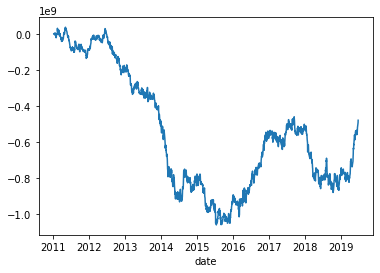

                xsfact-lrkurtsma-commod_mkts-1-2-1-0.2
sharp_ratio_1y                            1.654706e+00
sharp_ratio_2y                            1.099099e-01
sharp_ratio_3y                            5.860014e-01
sharp_ratio_4y                            6.079464e-01
sharp_ratio_5y                            3.934261e-01
sharp_ratio_6y                           -1.351147e-01
sharp_ratio_8y                           -2.590887e-01
std_pnl_1y                                1.308530e+07
std_pnl_2y                                1.310667e+07
std_pnl_3y                                1.345145e+07
std_pnl_4y                                1.341987e+07
std_pnl_5y                                1.333626e+07
std_pnl_6y                                1.349432e+07
std_pnl_8y                                1.243455e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


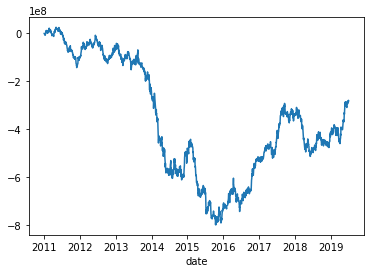

                xsfact-lrkurtsma-commod_mkts-1-2-5-0.2
sharp_ratio_1y                            1.586633e+00
sharp_ratio_2y                            6.037986e-01
sharp_ratio_3y                            1.094382e+00
sharp_ratio_4y                            7.143280e-01
sharp_ratio_5y                            4.169263e-01
sharp_ratio_6y                           -1.899780e-01
sharp_ratio_8y                           -2.667090e-01
std_pnl_1y                                8.495117e+06
std_pnl_2y                                8.382091e+06
std_pnl_3y                                8.322244e+06
std_pnl_4y                                8.713398e+06
std_pnl_5y                                9.160957e+06
std_pnl_6y                                9.439153e+06
std_pnl_8y                                8.701242e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


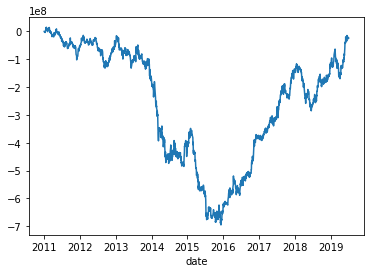

                xsfact-lrkurtsma-commod_mkts-1-2-10-0.2
sharp_ratio_1y                             2.006825e+00
sharp_ratio_2y                             1.173414e+00
sharp_ratio_3y                             1.497258e+00
sharp_ratio_4y                             1.184283e+00
sharp_ratio_5y                             6.845475e-01
sharp_ratio_6y                             9.829734e-02
sharp_ratio_8y                            -1.743181e-03
std_pnl_1y                                 7.782328e+06
std_pnl_2y                                 7.678953e+06
std_pnl_3y                                 7.465514e+06
std_pnl_4y                                 7.704463e+06
std_pnl_5y                                 8.227302e+06
std_pnl_6y                                 8.603993e+06
std_pnl_8y                                 7.928098e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


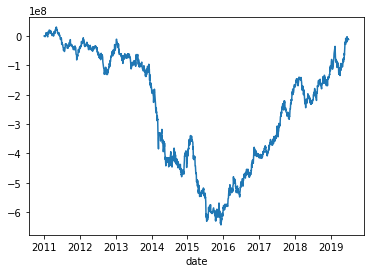

                xsfact-lrkurtsma-commod_mkts-1-2-15-0.2
sharp_ratio_1y                             1.824232e+00
sharp_ratio_2y                             1.426338e+00
sharp_ratio_3y                             1.498680e+00
sharp_ratio_4y                             1.194712e+00
sharp_ratio_5y                             6.880827e-01
sharp_ratio_6y                             1.056931e-01
sharp_ratio_8y                            -4.193644e-03
std_pnl_1y                                 7.478372e+06
std_pnl_2y                                 7.258049e+06
std_pnl_3y                                 7.115788e+06
std_pnl_4y                                 7.323867e+06
std_pnl_5y                                 7.852660e+06
std_pnl_6y                                 8.166522e+06
std_pnl_8y                                 7.519779e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


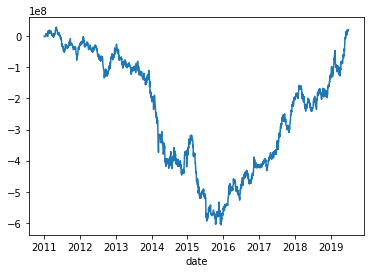

                xsfact-lrkurtsma-commod_mkts-1-2-20-0.2
sharp_ratio_1y                             2.284506e+00
sharp_ratio_2y                             1.765296e+00
sharp_ratio_3y                             1.592262e+00
sharp_ratio_4y                             1.250813e+00
sharp_ratio_5y                             7.381615e-01
sharp_ratio_6y                             1.757390e-01
sharp_ratio_8y                             3.389750e-02
std_pnl_1y                                 7.234344e+06
std_pnl_2y                                 7.017016e+06
std_pnl_3y                                 6.863321e+06
std_pnl_4y                                 7.016704e+06
std_pnl_5y                                 7.557509e+06
std_pnl_6y                                 7.828996e+06
std_pnl_8y                                 7.215657e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


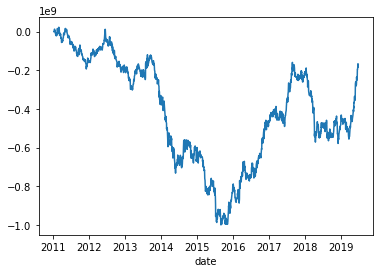

                xsfact-lrkurtsma-commod_mkts-1-3-1-0.2
sharp_ratio_1y                            1.694334e+00
sharp_ratio_2y                            5.312717e-01
sharp_ratio_3y                            9.425741e-01
sharp_ratio_4y                            7.964559e-01
sharp_ratio_5y                            4.826352e-01
sharp_ratio_6y                            3.024913e-02
sharp_ratio_8y                           -7.352560e-02
std_pnl_1y                                1.251416e+07
std_pnl_2y                                1.343445e+07
std_pnl_3y                                1.340881e+07
std_pnl_4y                                1.359610e+07
std_pnl_5y                                1.350809e+07
std_pnl_6y                                1.372527e+07
std_pnl_8y                                1.261621e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


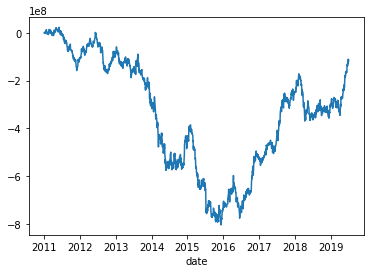

                xsfact-lrkurtsma-commod_mkts-1-3-5-0.2
sharp_ratio_1y                            1.697309e+00
sharp_ratio_2y                            1.084899e+00
sharp_ratio_3y                            1.403507e+00
sharp_ratio_4y                            8.670192e-01
sharp_ratio_5y                            5.567301e-01
sharp_ratio_6y                            3.853959e-02
sharp_ratio_8y                           -9.877029e-02
std_pnl_1y                                9.146900e+06
std_pnl_2y                                9.661843e+06
std_pnl_3y                                9.467708e+06
std_pnl_4y                                9.847729e+06
std_pnl_5y                                1.020031e+07
std_pnl_6y                                1.044678e+07
std_pnl_8y                                9.632065e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


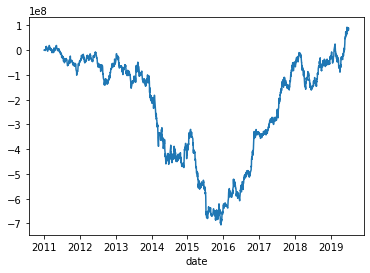

                xsfact-lrkurtsma-commod_mkts-1-3-10-0.2
sharp_ratio_1y                             1.770640e+00
sharp_ratio_2y                             1.323281e+00
sharp_ratio_3y                             1.622390e+00
sharp_ratio_4y                             1.206193e+00
sharp_ratio_5y                             7.545238e-01
sharp_ratio_6y                             2.380601e-01
sharp_ratio_8y                             9.105622e-02
std_pnl_1y                                 8.489397e+06
std_pnl_2y                                 8.699180e+06
std_pnl_3y                                 8.494638e+06
std_pnl_4y                                 8.694954e+06
std_pnl_5y                                 9.125878e+06
std_pnl_6y                                 9.498117e+06
std_pnl_8y                                 8.752728e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


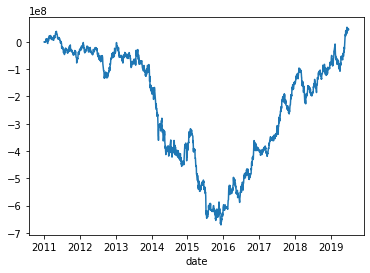

                xsfact-lrkurtsma-commod_mkts-1-3-15-0.2
sharp_ratio_1y                             1.872514e+00
sharp_ratio_2y                             1.477759e+00
sharp_ratio_3y                             1.543281e+00
sharp_ratio_4y                             1.151049e+00
sharp_ratio_5y                             6.605447e-01
sharp_ratio_6y                             1.426874e-01
sharp_ratio_8y                             4.830628e-02
std_pnl_1y                                 8.085875e+06
std_pnl_2y                                 8.285173e+06
std_pnl_3y                                 8.198233e+06
std_pnl_4y                                 8.360124e+06
std_pnl_5y                                 8.796740e+06
std_pnl_6y                                 9.080557e+06
std_pnl_8y                                 8.336017e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


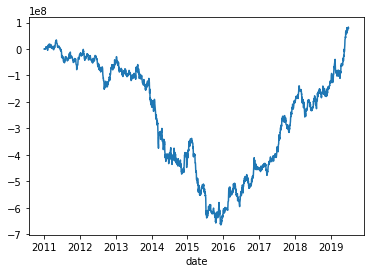

                xsfact-lrkurtsma-commod_mkts-1-3-20-0.2
sharp_ratio_1y                             2.516223e+00
sharp_ratio_2y                             1.942980e+00
sharp_ratio_3y                             1.724358e+00
sharp_ratio_4y                             1.266779e+00
sharp_ratio_5y                             7.627244e-01
sharp_ratio_6y                             2.274741e-01
sharp_ratio_8y                             8.893462e-02
std_pnl_1y                                 7.822713e+06
std_pnl_2y                                 7.938315e+06
std_pnl_3y                                 7.855344e+06
std_pnl_4y                                 8.006804e+06
std_pnl_5y                                 8.476683e+06
std_pnl_6y                                 8.712514e+06
std_pnl_8y                                 8.001775e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


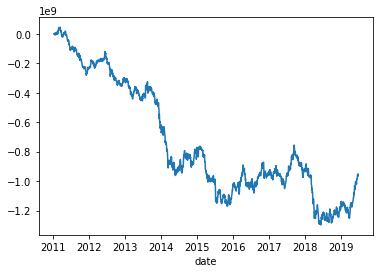

                xsfact-lrkurtsma-commod_mkts-1-4-1-0.2
sharp_ratio_1y                            1.553882e+00
sharp_ratio_2y                            4.933474e-02
sharp_ratio_3y                            1.111394e-01
sharp_ratio_4y                            6.677669e-02
sharp_ratio_5y                           -4.799723e-02
sharp_ratio_6y                           -4.194238e-01
sharp_ratio_8y                           -5.603702e-01
std_pnl_1y                                1.243680e+07
std_pnl_2y                                1.356714e+07
std_pnl_3y                                1.323444e+07
std_pnl_4y                                1.319796e+07
std_pnl_5y                                1.319828e+07
std_pnl_6y                                1.346472e+07
std_pnl_8y                                1.240413e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


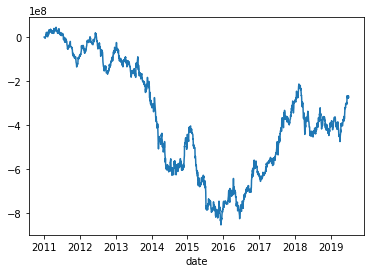

                xsfact-lrkurtsma-commod_mkts-1-4-5-0.2
sharp_ratio_1y                            1.105723e+00
sharp_ratio_2y                            6.876462e-01
sharp_ratio_3y                            1.031594e+00
sharp_ratio_4y                            5.989704e-01
sharp_ratio_5y                            3.725597e-01
sharp_ratio_6y                           -1.129045e-01
sharp_ratio_8y                           -2.236378e-01
std_pnl_1y                                1.008750e+07
std_pnl_2y                                1.101854e+07
std_pnl_3y                                1.046971e+07
std_pnl_4y                                1.076762e+07
std_pnl_5y                                1.108935e+07
std_pnl_6y                                1.128340e+07
std_pnl_8y                                1.038809e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


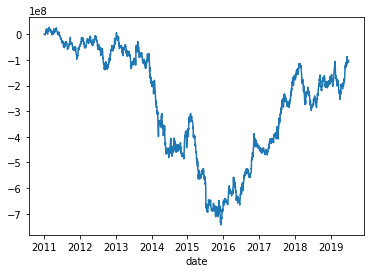

                xsfact-lrkurtsma-commod_mkts-1-4-10-0.2
sharp_ratio_1y                             1.144584e+00
sharp_ratio_2y                             9.394820e-01
sharp_ratio_3y                             1.147093e+00
sharp_ratio_4y                             7.840130e-01
sharp_ratio_5y                             4.603033e-01
sharp_ratio_6y                             7.638165e-04
sharp_ratio_8y                            -7.809572e-02
std_pnl_1y                                 9.469697e+06
std_pnl_2y                                 9.767996e+06
std_pnl_3y                                 9.432894e+06
std_pnl_4y                                 9.518811e+06
std_pnl_5y                                 9.960630e+06
std_pnl_6y                                 1.027148e+07
std_pnl_8y                                 9.463841e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


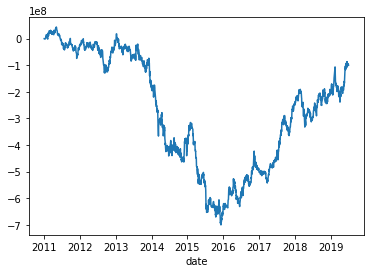

                xsfact-lrkurtsma-commod_mkts-1-4-15-0.2
sharp_ratio_1y                             1.398169e+00
sharp_ratio_2y                             1.207502e+00
sharp_ratio_3y                             1.163585e+00
sharp_ratio_4y                             8.037456e-01
sharp_ratio_5y                             4.382878e-01
sharp_ratio_6y                            -4.009298e-02
sharp_ratio_8y                            -8.445006e-02
std_pnl_1y                                 9.193415e+06
std_pnl_2y                                 9.291376e+06
std_pnl_3y                                 9.031750e+06
std_pnl_4y                                 9.086293e+06
std_pnl_5y                                 9.525965e+06
std_pnl_6y                                 9.735439e+06
std_pnl_8y                                 8.948570e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


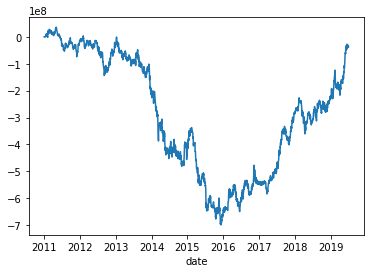

                xsfact-lrkurtsma-commod_mkts-1-4-20-0.2
sharp_ratio_1y                             2.052649e+00
sharp_ratio_2y                             1.696917e+00
sharp_ratio_3y                             1.436804e+00
sharp_ratio_4y                             9.575508e-01
sharp_ratio_5y                             5.674424e-01
sharp_ratio_6y                             6.345035e-02
sharp_ratio_8y                            -2.275348e-02
std_pnl_1y                                 8.667730e+06
std_pnl_2y                                 8.724899e+06
std_pnl_3y                                 8.529146e+06
std_pnl_4y                                 8.611036e+06
std_pnl_5y                                 9.090599e+06
std_pnl_6y                                 9.292185e+06
std_pnl_8y                                 8.553127e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


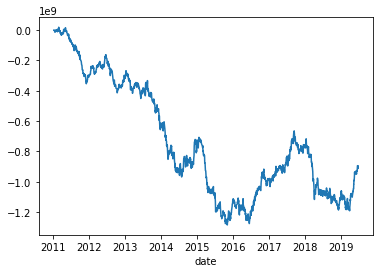

                xsfact-lrkurtsma-commod_mkts-1-5-1-0.2
sharp_ratio_1y                            9.213289e-01
sharp_ratio_2y                           -1.400621e-01
sharp_ratio_3y                            4.860571e-01
sharp_ratio_4y                            2.217727e-01
sharp_ratio_5y                            1.344583e-02
sharp_ratio_6y                           -4.107750e-01
sharp_ratio_8y                           -5.342333e-01
std_pnl_1y                                1.252077e+07
std_pnl_2y                                1.386062e+07
std_pnl_3y                                1.340284e+07
std_pnl_4y                                1.346305e+07
std_pnl_5y                                1.365916e+07
std_pnl_6y                                1.376294e+07
std_pnl_8y                                1.270274e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


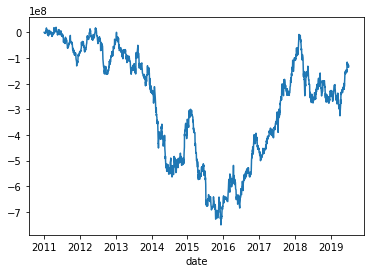

                xsfact-lrkurtsma-commod_mkts-1-5-5-0.2
sharp_ratio_1y                            7.859877e-01
sharp_ratio_2y                            5.694494e-01
sharp_ratio_3y                            9.427860e-01
sharp_ratio_4y                            5.991033e-01
sharp_ratio_5y                            4.397451e-01
sharp_ratio_6y                           -3.045523e-03
sharp_ratio_8y                           -9.518464e-02
std_pnl_1y                                1.080691e+07
std_pnl_2y                                1.180315e+07
std_pnl_3y                                1.121912e+07
std_pnl_4y                                1.149448e+07
std_pnl_5y                                1.183519e+07
std_pnl_6y                                1.199349e+07
std_pnl_8y                                1.103153e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


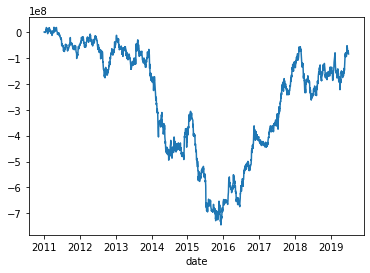

                xsfact-lrkurtsma-commod_mkts-1-5-10-0.2
sharp_ratio_1y                             1.011674e+00
sharp_ratio_2y                             8.117211e-01
sharp_ratio_3y                             1.109149e+00
sharp_ratio_4y                             7.604335e-01
sharp_ratio_5y                             4.760061e-01
sharp_ratio_6y                             3.054934e-02
sharp_ratio_8y                            -4.684502e-02
std_pnl_1y                                 1.018565e+07
std_pnl_2y                                 1.053427e+07
std_pnl_3y                                 1.014899e+07
std_pnl_4y                                 1.020562e+07
std_pnl_5y                                 1.065595e+07
std_pnl_6y                                 1.089409e+07
std_pnl_8y                                 1.003179e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


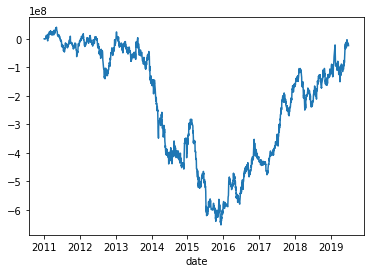

                xsfact-lrkurtsma-commod_mkts-1-5-15-0.2
sharp_ratio_1y                             1.334884e+00
sharp_ratio_2y                             1.112763e+00
sharp_ratio_3y                             1.136612e+00
sharp_ratio_4y                             8.273707e-01
sharp_ratio_5y                             5.084320e-01
sharp_ratio_6y                             3.326933e-02
sharp_ratio_8y                            -1.305029e-02
std_pnl_1y                                 9.721566e+06
std_pnl_2y                                 9.819771e+06
std_pnl_3y                                 9.577087e+06
std_pnl_4y                                 9.593903e+06
std_pnl_5y                                 1.009258e+07
std_pnl_6y                                 1.027162e+07
std_pnl_8y                                 9.450831e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


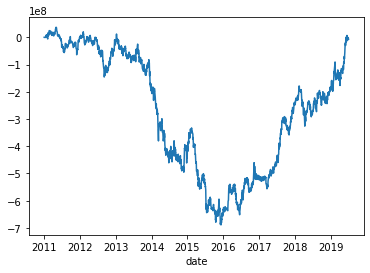

                xsfact-lrkurtsma-commod_mkts-1-5-20-0.2
sharp_ratio_1y                             1.920513e+00
sharp_ratio_2y                             1.599962e+00
sharp_ratio_3y                             1.418248e+00
sharp_ratio_4y                             9.527965e-01
sharp_ratio_5y                             5.880309e-01
sharp_ratio_6y                             7.448650e-02
sharp_ratio_8y                             4.638661e-03
std_pnl_1y                                 9.072186e+06
std_pnl_2y                                 9.191017e+06
std_pnl_3y                                 9.049436e+06
std_pnl_4y                                 9.097244e+06
std_pnl_5y                                 9.611926e+06
std_pnl_6y                                 9.783329e+06
std_pnl_8y                                 9.009228e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


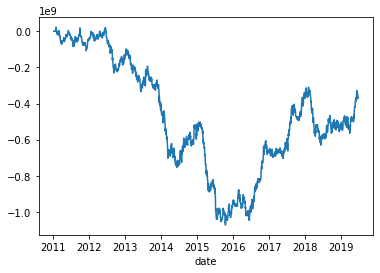

                xsfact-lrkurtsma-commod_mkts-1-10-1-0.2
sharp_ratio_1y                             1.081760e+00
sharp_ratio_2y                             6.286766e-01
sharp_ratio_3y                             9.916660e-01
sharp_ratio_4y                             6.198378e-01
sharp_ratio_5y                             3.514122e-01
sharp_ratio_6y                            -7.346746e-02
sharp_ratio_8y                            -2.130719e-01
std_pnl_1y                                 1.269096e+07
std_pnl_2y                                 1.355881e+07
std_pnl_3y                                 1.324600e+07
std_pnl_4y                                 1.314382e+07
std_pnl_5y                                 1.347673e+07
std_pnl_6y                                 1.364814e+07
std_pnl_8y                                 1.267626e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


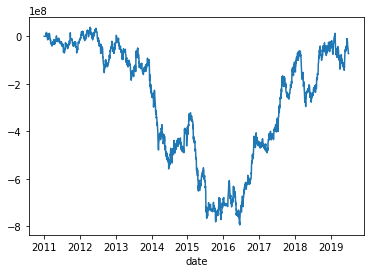

                xsfact-lrkurtsma-commod_mkts-1-10-5-0.2
sharp_ratio_1y                             9.074324e-01
sharp_ratio_2y                             7.924217e-01
sharp_ratio_3y                             1.121642e+00
sharp_ratio_4y                             6.943106e-01
sharp_ratio_5y                             4.717263e-01
sharp_ratio_6y                             6.238173e-02
sharp_ratio_8y                            -3.044724e-02
std_pnl_1y                                 1.196574e+07
std_pnl_2y                                 1.279958e+07
std_pnl_3y                                 1.255711e+07
std_pnl_4y                                 1.245390e+07
std_pnl_5y                                 1.275333e+07
std_pnl_6y                                 1.285245e+07
std_pnl_8y                                 1.184475e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


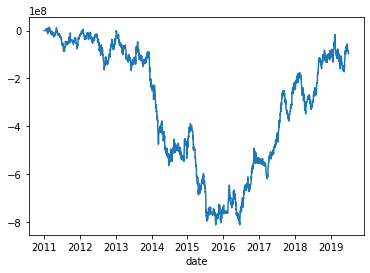

                xsfact-lrkurtsma-commod_mkts-1-10-10-0.2
sharp_ratio_1y                              1.142545e+00
sharp_ratio_2y                              1.001823e+00
sharp_ratio_3y                              1.189189e+00
sharp_ratio_4y                              7.763126e-01
sharp_ratio_5y                              4.877834e-01
sharp_ratio_6y                              2.631937e-02
sharp_ratio_8y                             -4.692957e-02
std_pnl_1y                                  1.133455e+07
std_pnl_2y                                  1.166261e+07
std_pnl_3y                                  1.172743e+07
std_pnl_4y                                  1.156098e+07
std_pnl_5y                                  1.191780e+07
std_pnl_6y                                  1.202661e+07
std_pnl_8y                                  1.110645e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


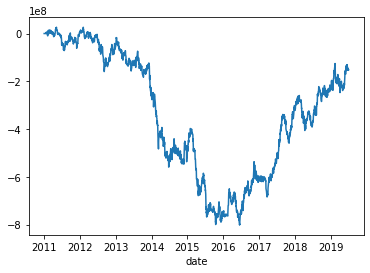

                xsfact-lrkurtsma-commod_mkts-1-10-15-0.2
sharp_ratio_1y                              1.350588e+00
sharp_ratio_2y                              1.125487e+00
sharp_ratio_3y                              1.158551e+00
sharp_ratio_4y                              7.248446e-01
sharp_ratio_5y                              4.466131e-01
sharp_ratio_6y                             -3.083795e-02
sharp_ratio_8y                             -1.074444e-01
std_pnl_1y                                  1.059230e+07
std_pnl_2y                                  1.076767e+07
std_pnl_3y                                  1.096813e+07
std_pnl_4y                                  1.077288e+07
std_pnl_5y                                  1.120918e+07
std_pnl_6y                                  1.127887e+07
std_pnl_8y                                  1.041594e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


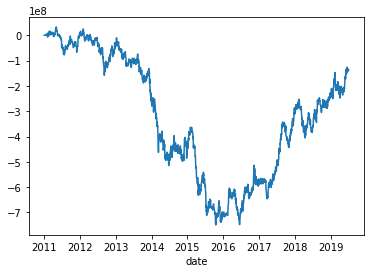

                xsfact-lrkurtsma-commod_mkts-1-10-20-0.2
sharp_ratio_1y                              1.495292e+00
sharp_ratio_2y                              1.207283e+00
sharp_ratio_3y                              1.134281e+00
sharp_ratio_4y                              7.079706e-01
sharp_ratio_5y                              4.287368e-01
sharp_ratio_6y                             -3.919283e-02
sharp_ratio_8y                             -1.002695e-01
std_pnl_1y                                  1.001173e+07
std_pnl_2y                                  1.024391e+07
std_pnl_3y                                  1.044966e+07
std_pnl_4y                                  1.031065e+07
std_pnl_5y                                  1.075692e+07
std_pnl_6y                                  1.081822e+07
std_pnl_8y                                  9.969718e+06


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


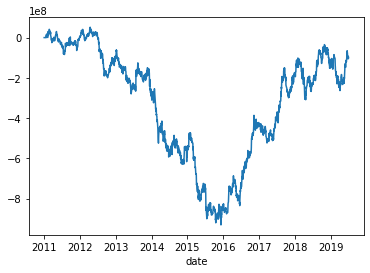

                xsfact-lrkurtsma-commod_mkts-1-15-1-0.2
sharp_ratio_1y                             6.519664e-01
sharp_ratio_2y                             6.704293e-01
sharp_ratio_3y                             9.982972e-01
sharp_ratio_4y                             7.689563e-01
sharp_ratio_5y                             4.455623e-01
sharp_ratio_6y                             9.964735e-02
sharp_ratio_8y                            -4.461078e-02
std_pnl_1y                                 1.264910e+07
std_pnl_2y                                 1.397044e+07
std_pnl_3y                                 1.388831e+07
std_pnl_4y                                 1.368861e+07
std_pnl_5y                                 1.376472e+07
std_pnl_6y                                 1.386820e+07
std_pnl_8y                                 1.277593e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


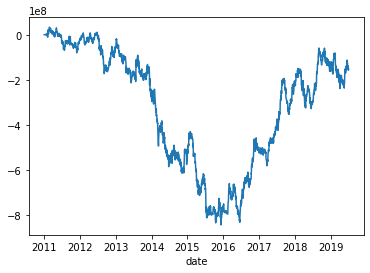

                xsfact-lrkurtsma-commod_mkts-1-15-5-0.2
sharp_ratio_1y                             7.702037e-01
sharp_ratio_2y                             6.148500e-01
sharp_ratio_3y                             9.953078e-01
sharp_ratio_4y                             6.518196e-01
sharp_ratio_5y                             4.130803e-01
sharp_ratio_6y                             6.243171e-03
sharp_ratio_8y                            -1.003318e-01
std_pnl_1y                                 1.197177e+07
std_pnl_2y                                 1.289651e+07
std_pnl_3y                                 1.280818e+07
std_pnl_4y                                 1.264743e+07
std_pnl_5y                                 1.288633e+07
std_pnl_6y                                 1.303730e+07
std_pnl_8y                                 1.200827e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


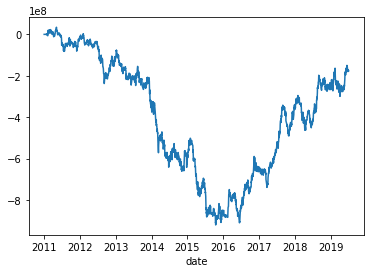

                xsfact-lrkurtsma-commod_mkts-1-15-10-0.2
sharp_ratio_1y                              1.350688e+00
sharp_ratio_2y                              9.782294e-01
sharp_ratio_3y                              1.149543e+00
sharp_ratio_4y                              7.634749e-01
sharp_ratio_5y                              4.674604e-01
sharp_ratio_6y                              2.478719e-02
sharp_ratio_8y                             -1.194665e-01
std_pnl_1y                                  1.170761e+07
std_pnl_2y                                  1.218951e+07
std_pnl_3y                                  1.225169e+07
std_pnl_4y                                  1.197907e+07
std_pnl_5y                                  1.227185e+07
std_pnl_6y                                  1.233720e+07
std_pnl_8y                                  1.139303e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


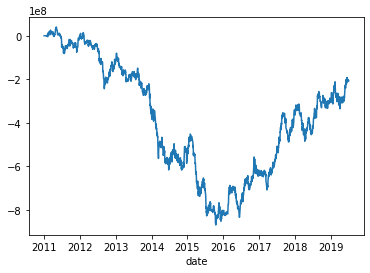

                xsfact-lrkurtsma-commod_mkts-1-15-15-0.2
sharp_ratio_1y                              1.289410e+00
sharp_ratio_2y                              9.152260e-01
sharp_ratio_3y                              1.013707e+00
sharp_ratio_4y                              6.988584e-01
sharp_ratio_5y                              4.256551e-01
sharp_ratio_6y                             -3.149929e-02
sharp_ratio_8y                             -1.491655e-01
std_pnl_1y                                  1.114794e+07
std_pnl_2y                                  1.165132e+07
std_pnl_3y                                  1.171093e+07
std_pnl_4y                                  1.144826e+07
std_pnl_5y                                  1.178005e+07
std_pnl_6y                                  1.179331e+07
std_pnl_8y                                  1.086769e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


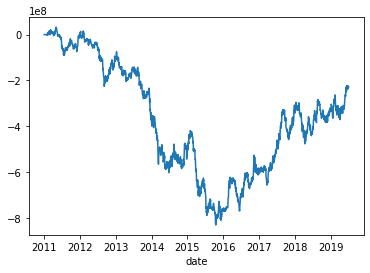

                xsfact-lrkurtsma-commod_mkts-1-15-20-0.2
sharp_ratio_1y                              1.163686e+00
sharp_ratio_2y                              7.587897e-01
sharp_ratio_3y                              8.965076e-01
sharp_ratio_4y                              6.520271e-01
sharp_ratio_5y                              3.994024e-01
sharp_ratio_6y                             -7.485776e-02
sharp_ratio_8y                             -1.626208e-01
std_pnl_1y                                  1.051819e+07
std_pnl_2y                                  1.122890e+07
std_pnl_3y                                  1.124453e+07
std_pnl_4y                                  1.104010e+07
std_pnl_5y                                  1.138594e+07
std_pnl_6y                                  1.140905e+07
std_pnl_8y                                  1.049260e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


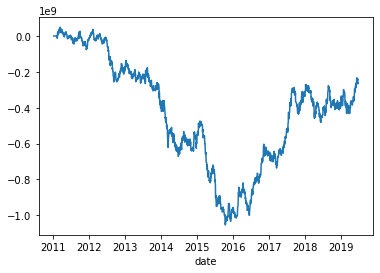

                xsfact-lrkurtsma-commod_mkts-1-20-1-0.2
sharp_ratio_1y                             9.285512e-01
sharp_ratio_2y                             6.762741e-01
sharp_ratio_3y                             1.046259e+00
sharp_ratio_4y                             6.086729e-01
sharp_ratio_5y                             3.703716e-01
sharp_ratio_6y                            -4.165769e-02
sharp_ratio_8y                            -1.725709e-01
std_pnl_1y                                 1.264058e+07
std_pnl_2y                                 1.364453e+07
std_pnl_3y                                 1.350031e+07
std_pnl_4y                                 1.336242e+07
std_pnl_5y                                 1.349154e+07
std_pnl_6y                                 1.350919e+07
std_pnl_8y                                 1.247883e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


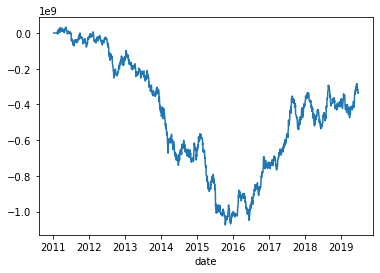

                xsfact-lrkurtsma-commod_mkts-1-20-5-0.2
sharp_ratio_1y                             9.489539e-01
sharp_ratio_2y                             6.666886e-01
sharp_ratio_3y                             1.065128e+00
sharp_ratio_4y                             6.510194e-01
sharp_ratio_5y                             3.854670e-01
sharp_ratio_6y                            -9.743771e-02
sharp_ratio_8y                            -2.284563e-01
std_pnl_1y                                 1.207838e+07
std_pnl_2y                                 1.280637e+07
std_pnl_3y                                 1.274641e+07
std_pnl_4y                                 1.264916e+07
std_pnl_5y                                 1.285649e+07
std_pnl_6y                                 1.286334e+07
std_pnl_8y                                 1.186142e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


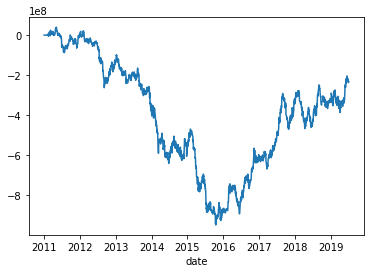

                xsfact-lrkurtsma-commod_mkts-1-20-10-0.2
sharp_ratio_1y                              1.093606e+00
sharp_ratio_2y                              7.375919e-01
sharp_ratio_3y                              1.013127e+00
sharp_ratio_4y                              6.831581e-01
sharp_ratio_5y                              4.033648e-01
sharp_ratio_6y                             -3.439963e-02
sharp_ratio_8y                             -1.582938e-01
std_pnl_1y                                  1.182367e+07
std_pnl_2y                                  1.234917e+07
std_pnl_3y                                  1.233202e+07
std_pnl_4y                                  1.215776e+07
std_pnl_5y                                  1.241743e+07
std_pnl_6y                                  1.239599e+07
std_pnl_8y                                  1.142378e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


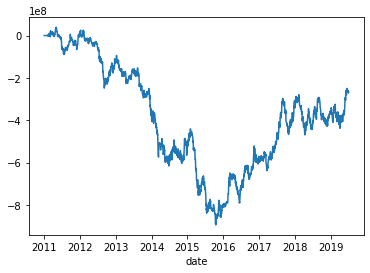

                xsfact-lrkurtsma-commod_mkts-1-20-15-0.2
sharp_ratio_1y                              8.617685e-01
sharp_ratio_2y                              6.106541e-01
sharp_ratio_3y                              8.022144e-01
sharp_ratio_4y                              6.120551e-01
sharp_ratio_5y                              3.508947e-01
sharp_ratio_6y                             -9.042739e-02
sharp_ratio_8y                             -1.844589e-01
std_pnl_1y                                  1.124305e+07
std_pnl_2y                                  1.200126e+07
std_pnl_3y                                  1.192494e+07
std_pnl_4y                                  1.180775e+07
std_pnl_5y                                  1.208186e+07
std_pnl_6y                                  1.202020e+07
std_pnl_8y                                  1.107607e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


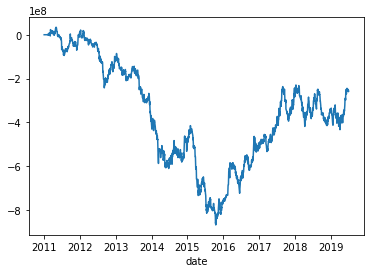

                xsfact-lrkurtsma-commod_mkts-1-20-20-0.2
sharp_ratio_1y                              5.301775e-01
sharp_ratio_2y                              4.134731e-01
sharp_ratio_3y                              7.180098e-01
sharp_ratio_4y                              6.176503e-01
sharp_ratio_5y                              3.621225e-01
sharp_ratio_6y                             -9.724249e-02
sharp_ratio_8y                             -1.783111e-01
std_pnl_1y                                  1.093851e+07
std_pnl_2y                                  1.183349e+07
std_pnl_3y                                  1.166260e+07
std_pnl_4y                                  1.157703e+07
std_pnl_5y                                  1.184931e+07
std_pnl_6y                                  1.177970e+07
std_pnl_8y                                  1.084004e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


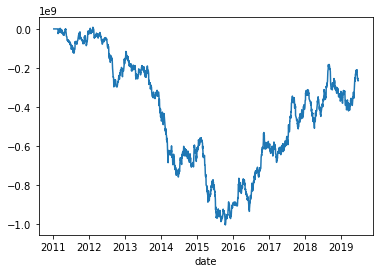

                xsfact-lrkurtsma-commod_mkts-1-25-1-0.2
sharp_ratio_1y                             6.464755e-01
sharp_ratio_2y                             7.995680e-01
sharp_ratio_3y                             9.802039e-01
sharp_ratio_4y                             7.012050e-01
sharp_ratio_5y                             4.703805e-01
sharp_ratio_6y                            -5.302194e-02
sharp_ratio_8y                            -1.244430e-01
std_pnl_1y                                 1.248575e+07
std_pnl_2y                                 1.293215e+07
std_pnl_3y                                 1.299117e+07
std_pnl_4y                                 1.286199e+07
std_pnl_5y                                 1.304848e+07
std_pnl_6y                                 1.306922e+07
std_pnl_8y                                 1.209842e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


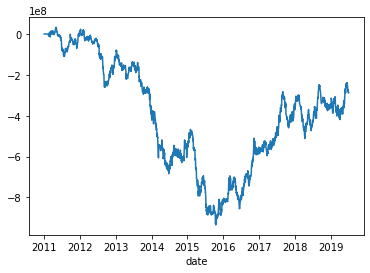

                xsfact-lrkurtsma-commod_mkts-1-25-5-0.2
sharp_ratio_1y                             7.713595e-01
sharp_ratio_2y                             5.295689e-01
sharp_ratio_3y                             8.627345e-01
sharp_ratio_4y                             5.877951e-01
sharp_ratio_5y                             3.826141e-01
sharp_ratio_6y                            -1.166515e-01
sharp_ratio_8y                            -1.782141e-01
std_pnl_1y                                 1.213448e+07
std_pnl_2y                                 1.265564e+07
std_pnl_3y                                 1.264754e+07
std_pnl_4y                                 1.260927e+07
std_pnl_5y                                 1.280087e+07
std_pnl_6y                                 1.276920e+07
std_pnl_8y                                 1.176697e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


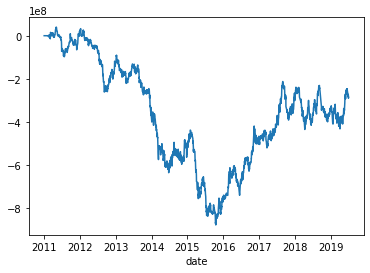

                xsfact-lrkurtsma-commod_mkts-1-25-10-0.2
sharp_ratio_1y                              4.799108e-01
sharp_ratio_2y                              3.248384e-01
sharp_ratio_3y                              6.618705e-01
sharp_ratio_4y                              5.503437e-01
sharp_ratio_5y                              3.395992e-01
sharp_ratio_6y                             -1.242297e-01
sharp_ratio_8y                             -1.895654e-01
std_pnl_1y                                  1.196092e+07
std_pnl_2y                                  1.253723e+07
std_pnl_3y                                  1.249223e+07
std_pnl_4y                                  1.241797e+07
std_pnl_5y                                  1.261861e+07
std_pnl_6y                                  1.251435e+07
std_pnl_8y                                  1.152611e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


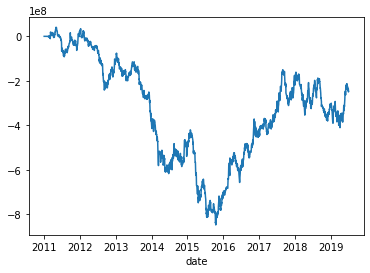

                xsfact-lrkurtsma-commod_mkts-1-25-15-0.2
sharp_ratio_1y                              1.517309e-01
sharp_ratio_2y                              2.187654e-01
sharp_ratio_3y                              5.901816e-01
sharp_ratio_4y                              5.935270e-01
sharp_ratio_5y                              3.656542e-01
sharp_ratio_6y                             -1.097255e-01
sharp_ratio_8y                             -1.660689e-01
std_pnl_1y                                  1.166731e+07
std_pnl_2y                                  1.242115e+07
std_pnl_3y                                  1.221845e+07
std_pnl_4y                                  1.219642e+07
std_pnl_5y                                  1.241447e+07
std_pnl_6y                                  1.227349e+07
std_pnl_8y                                  1.129722e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


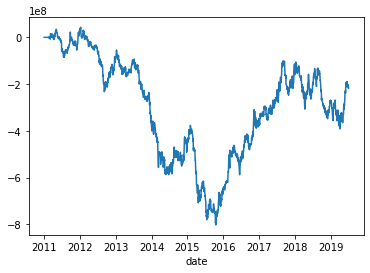

                xsfact-lrkurtsma-commod_mkts-1-25-20-0.2
sharp_ratio_1y                             -6.053734e-02
sharp_ratio_2y                              1.200110e-01
sharp_ratio_3y                              5.265027e-01
sharp_ratio_4y                              6.078320e-01
sharp_ratio_5y                              3.724159e-01
sharp_ratio_6y                             -1.048480e-01
sharp_ratio_8y                             -1.457082e-01
std_pnl_1y                                  1.146405e+07
std_pnl_2y                                  1.228607e+07
std_pnl_3y                                  1.204027e+07
std_pnl_4y                                  1.199873e+07
std_pnl_5y                                  1.219344e+07
std_pnl_6y                                  1.205118e+07
std_pnl_8y                                  1.108213e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


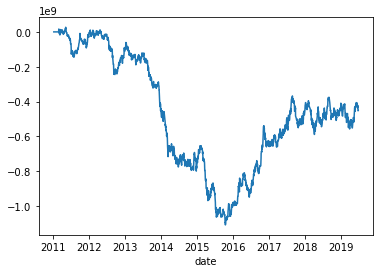

                xsfact-lrkurtsma-commod_mkts-1-30-1-0.2
sharp_ratio_1y                             2.828501e-01
sharp_ratio_2y                             2.231930e-01
sharp_ratio_3y                             7.410097e-01
sharp_ratio_4y                             5.802381e-01
sharp_ratio_5y                             2.994918e-01
sharp_ratio_6y                            -2.654901e-01
sharp_ratio_8y                            -2.582913e-01
std_pnl_1y                                 1.262643e+07
std_pnl_2y                                 1.329011e+07
std_pnl_3y                                 1.325405e+07
std_pnl_4y                                 1.300926e+07
std_pnl_5y                                 1.313025e+07
std_pnl_6y                                 1.310174e+07
std_pnl_8y                                 1.213777e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


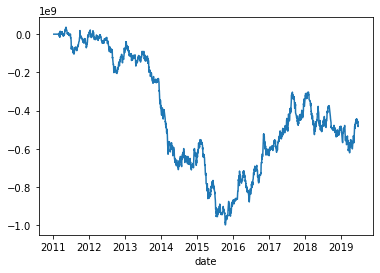

                xsfact-lrkurtsma-commod_mkts-1-30-5-0.2
sharp_ratio_1y                             3.190785e-02
sharp_ratio_2y                             2.344680e-02
sharp_ratio_3y                             5.561425e-01
sharp_ratio_4y                             4.294660e-01
sharp_ratio_5y                             2.105511e-01
sharp_ratio_6y                            -3.188000e-01
sharp_ratio_8y                            -3.170865e-01
std_pnl_1y                                 1.225569e+07
std_pnl_2y                                 1.311581e+07
std_pnl_3y                                 1.298359e+07
std_pnl_4y                                 1.283351e+07
std_pnl_5y                                 1.295423e+07
std_pnl_6y                                 1.286212e+07
std_pnl_8y                                 1.184494e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


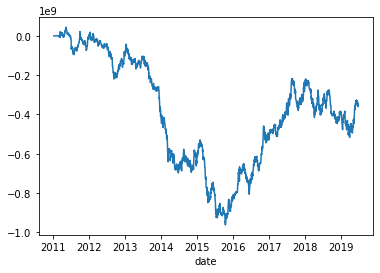

                xsfact-lrkurtsma-commod_mkts-1-30-10-0.2
sharp_ratio_1y                              1.350663e-03
sharp_ratio_2y                              6.779901e-02
sharp_ratio_3y                              6.339395e-01
sharp_ratio_4y                              5.702163e-01
sharp_ratio_5y                              3.262074e-01
sharp_ratio_6y                             -2.146867e-01
sharp_ratio_8y                             -2.442515e-01
std_pnl_1y                                  1.204640e+07
std_pnl_2y                                  1.278648e+07
std_pnl_3y                                  1.260916e+07
std_pnl_4y                                  1.250337e+07
std_pnl_5y                                  1.267191e+07
std_pnl_6y                                  1.255248e+07
std_pnl_8y                                  1.156419e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


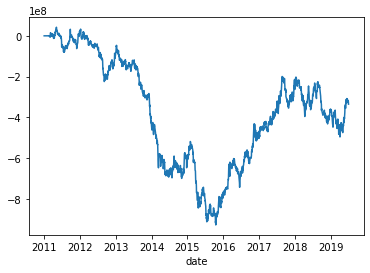

                xsfact-lrkurtsma-commod_mkts-1-30-15-0.2
sharp_ratio_1y                             -1.989090e-01
sharp_ratio_2y                              7.244832e-02
sharp_ratio_3y                              5.766546e-01
sharp_ratio_4y                              6.072769e-01
sharp_ratio_5y                              3.526368e-01
sharp_ratio_6y                             -1.854494e-01
sharp_ratio_8y                             -2.325731e-01
std_pnl_1y                                  1.184787e+07
std_pnl_2y                                  1.266369e+07
std_pnl_3y                                  1.241639e+07
std_pnl_4y                                  1.230286e+07
std_pnl_5y                                  1.248171e+07
std_pnl_6y                                  1.233281e+07
std_pnl_8y                                  1.135126e+07


<ipython-input-7-3db8f74810e2>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']
<ipython-input-7-3db8f74810e2>:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['split_idx'] = adf['split_idx']


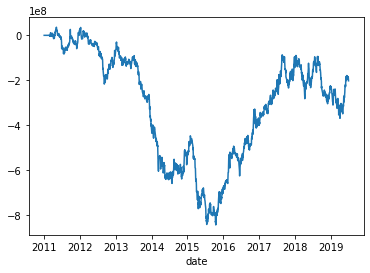

                xsfact-lrkurtsma-commod_mkts-1-30-20-0.2
sharp_ratio_1y                             -2.133153e-01
sharp_ratio_2y                              9.643996e-02
sharp_ratio_3y                              6.152579e-01
sharp_ratio_4y                              7.071761e-01
sharp_ratio_5y                              4.442561e-01
sharp_ratio_6y                             -9.369751e-02
sharp_ratio_8y                             -1.360435e-01
std_pnl_1y                                  1.156907e+07
std_pnl_2y                                  1.249945e+07
std_pnl_3y                                  1.223224e+07
std_pnl_4y                                  1.216942e+07
std_pnl_5y                                  1.234695e+07
std_pnl_6y                                  1.218393e+07
std_pnl_8y                                  1.119871e+07
          1         5         10        15        20
1   2.574641  1.782136  2.217232  2.328405  2.701933
2   1.654706  1.586633  2.006825  1.824

In [8]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]
reverse_list = ['lrkurt']

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM']
# 'SM', "SF", 'au', 'ag', 'fu', 'eg', 'b', 'AP']

product_list = commod_mkts # metal_mixed_mkts # +  petro_mixed_mkts #  
# # ind_metal_mkts #commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts
product_name = 'commod_mkts'

sim_name = 'xsfact'
run_mode = 'lrkurtsma'

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2019,6,30)
quantile = 0.2
cost_ratio = 0.5
pos_std = 1
std_win = 20
win = 60
ma_win = 120
rebal = 5
params = [0.0, 0.0]

exec_field = 'open'
save_loc = "C:\\dev\\data\\selected_%s_" % ('_'.join([sim_name, run_mode, product_name, str(quantile), str(end_date)]))

#save_loc = "C:\\dev\\data\\combined_carry_" + product_name + "_" + str(end_date) + '_'

curve_list = ['linear', 'sign', 'sigmoid', 'semilinear']
crv_param = 2.0

index_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30] # [i for i in range(10, 250, 10)]  # [1, 3, 5, 7, 10, 15, 20] # + range(10, 250, 10) #  #range(8, 44, 4) # 
column_list =  [1, 5, 10, 15, 20] # [1, 2, 3, 4, 5, 10, 15, 20] # range(10, 130, 10) # curve_list #   # [60, 80, 100, 120, 140, 160] #[i * 0.01 for i in range(0, 32, 4)] #

sratio = {}
run_sratio = True

pos_sum = pd.DataFrame()
pos_list = []
scenarios = list(itertools.product(index_list, column_list))

if 'ts' in sim_name:
    sim_func = run_ts_test
elif 'xs' in sim_name:
    sim_func = run_xs_test
if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)

port_pnl = pd.Series()
#pos_map = (None, {}, '')
#pos_map = (misc.sign, {}, 'sign')
pos_map = (dh.response_curve, {'param': crv_param, "response": 'linear'}, 'linear')

for scen in scenarios:
    scen_x = scen[0]
    scen_y = scen[1]
    if run_mode in ['ryield']:
        win = 1
        ma_win = 1
        rebal = scen_x
        pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
        if sim_name == 'xscarry':
            quantile = scen_x * 0.1
    elif run_mode in ['basmom', 'mom']:
        win = scen_x
        ma_win = 1
        rebal = scen_y    
    elif run_mode in ['mixmom']:
        win = scen_x
        ma_win = 1
        rebal = scen_y
    elif ('ts' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y
        #pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
    elif ('xs' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y    
    elif run_mode in ['basmomxma', 'basmomsma', 'basmomnma', 'basmomnmb', 'basmomzlv', \
                      'momsma', 'momxma', 'momnma', 'momnmb', 'momzlv']:
        win = scen_x
        ma_win = scen_y
        rebal = 5        
    else:
        print("unsupported run_mode")
        continue

    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharp_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]

cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')

if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])


In [11]:
save_xl = True

if run_sratio and save_xl:
    xlfile = save_loc + "sratio_heatmap.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for yr in sratio_years:
        lbl = 'sharp_ratio_' + str(yr) + 'y'
        sratio[yr].to_excel(writer, lbl, startcol= 0, startrow=1)
    writer.save()    